In [1]:
import sys
sys.path.append('../src')

import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from graph import homophily, performance as perf
from utils import bidict
from collections import defaultdict

/home/tim/miniconda3/envs/echo/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
datasets = ['synth_5_comms']
model = 'DistMult'

conditions = ['epistemic', 'ideological']
candidate_modes = ['random', 'ranked']

num_runs = 9

In [15]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

log_dirs = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(str))))

for dataset in datasets:
    for candidate_mode in candidate_modes:
        for condition in conditions:
            try:
                save_path = os.path.join(parent_dir, 'log', dataset, condition, candidate_mode, model)
                sorted_dirs = sorted(os.listdir(save_path))

                for run in sorted_dirs[-num_runs:]:
                    mode = '[{}]'.format(run)
                    log_dir = os.path.join(save_path, run)
                    log_dirs[dataset][candidate_mode][condition][run] = log_dir
            except FileNotFoundError:
                print("No directory found for {}".format(save_path))

No directory found for /home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/epistemic/random/DistMult
No directory found for /home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/ideological/random/DistMult
No directory found for /home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/conditional_ideological/random/DistMult
No directory found for /home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/epistemic/ranked/DistMult
No directory found for /home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/conditional_ideological/ranked/DistMult


In [16]:
log_dirs

defaultdict(<function __main__.<lambda>()>,
            {'synth_5_comms': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'ranked': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'ideological': defaultdict(str,
                                                   {'1669126500.3413048': '/home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/ideological/ranked/DistMult/1669126500.3413048',
                                                    '1669127297.1827824': '/home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/ideological/ranked/DistMult/1669127297.1827824',
                                                    '1669127654.6524725': '/home/tim/git-projects/2022-Echo-Chamber/log/synth_5_comms/ideological/ranked/DistMult/1669127654.6524725',
                                                    '1669128310.443099': '/home/tim/git-projects/2022-Echo-Chamber/log/synth_5_c

In [17]:
logs = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(pd.DataFrame))))

min_epochs = 999

for dataset in log_dirs:
    for candidate_mode in log_dirs[dataset]:
        for condition in log_dirs[dataset][candidate_mode]:
            for run in log_dirs[dataset][candidate_mode][condition]:
                df_log = pd.read_csv(os.path.join(log_dirs[dataset][candidate_mode][condition][run], 'simulation.csv'), index_col=0)
                num_epochs = df_log.shape[0]
                print(condition, num_epochs)

                logs[dataset][candidate_mode][condition][run] = df_log

                if min_epochs > num_epochs:
                    min_epochs = num_epochs

print()
print("Current Epoch: {}".format(min_epochs))

ideological 4
ideological 1
ideological 4
ideological 5
ideological 50

Current Epoch: 1


In [7]:
starting_user_graph = nx.read_gexf(os.path.join(parent_dir, 'dataset', 'processed', datasets[0], 'user_graph.gexf'))
starting_degree_sequence = sorted([d for n, d in starting_user_graph.degree()], reverse=True)
starting_community_mapper = bidict(nx.get_node_attributes(starting_user_graph, 'block'))

starting_degree = list(starting_user_graph.degree())
starting_degree = [x[1] for x in starting_degree]
starting_degree = np.mean(starting_degree)

In [8]:
colors = {
    'epistemic': {
        'random': '#a2d5c6',
        'recommendation': '#c3b1e1',
        'weak-tie': '#ff5252'
    },
    'ideological': {
        'random': '#077b8a',
        'recommendation': '#5c3c92',
        'weak-tie': '#a70000'
    }
}

# Main Section - Multiple Datasets

## Number of Edges

defaultdict(<function <lambda> at 0x7fa642a180e0>, {})


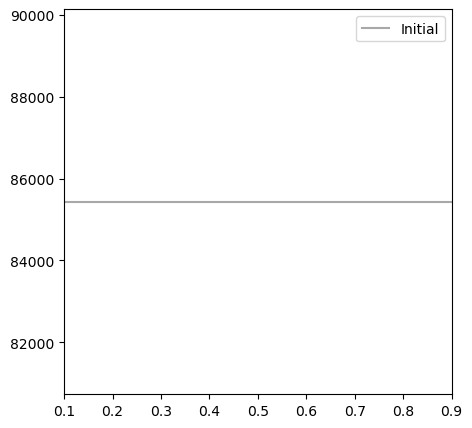

In [13]:
fig = plt.figure("Num Edges - Summarized", figsize=(5, 5))
plt.xticks(np.arange(0, 9, step=1), labels=['{:.1f}'.format(x) for x in np.arange(0.1, 1, 0.1)])
plt.axhline(y=len(starting_user_graph.edges()), color='#a8a8a8', linestyle='-', label='Initial')

print(logs)

for dataset in logs:
    print(dataset)
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            print(condition)
            print(candidate_mode)
            raise Exception
            num_edges = {}
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]
                sub_logs = log_df.iloc[:min_epochs]
                num_edges[run] = sub_logs['num_edges']

            num_edges_df = pd.DataFrame(num_edges)

            row_data = num_edges_df.iloc[-1].tolist()

            color = colors[condition][candidate_mode]
            
            plt.plot(row_data, c=color, marker="o", label='{} x {}'.format(condition, candidate_mode))

plt.legend()
#plt.savefig(os.path.join(parent_dir, 'num_edges.png'), dpi=300)
plt.show()

## Homophily

[0.6829614288124197, 0.6400184848014908, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6634045295155948, 0.695714247825282, 0.7198613785415613, 0.8539910159224391, 0.919516181342352, 0.9446822288617348, 0.9694783016439008, 0.9734985679544952, 0.9790050912697512]
[0.6661798317804709, 0.6658240989358244, 0.6718226115141936, 0.6977961404148376, 0.7087578820432602, 0.6870814143747008, 0.7073852732768866, 0.7029764201043839, 0.7114651500081379]
[0.6688944153691374, 0.7068560865608347, 0.7529416583129701, 0.8620049057345363, 0.895531607777682, 0.90247132069615, 0.9146749512784488, 0.903708310172202, 0.9286286240548396]


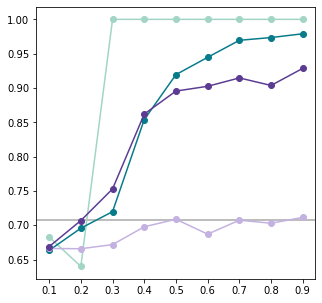

In [75]:
# Epistemic
fig = plt.figure("Homophily - Summarized", figsize=(5,5))

plt.xticks(np.arange(0, 9, step=1), labels=['{:.1f}'.format(x) for x in np.arange(0.1, 1, 0.1)])

initial_homophily = homophily(starting_user_graph, starting_community_mapper.inverse)['global']
plt.axhline(y=initial_homophily, color='#a8a8a8', linestyle='-', label='initial')

for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]

                sub_logs = log_df.iloc[:min_epochs]
                homophily_d[run] = sub_logs['homophily_global']

            homophily_df = pd.DataFrame(homophily_d)

            row_data = homophily_df.iloc[-1].tolist()
            color = colors[condition][candidate_mode]

            plt.plot(row_data, c=color, marker="o", label='{} x {}'.format(condition, candidate_mode))

plt.legend()
#plt.savefig(os.path.join(parent_dir, 'homophily.png'), dpi=300)
plt.show()

## Modularity

[0.1704322099794629, 0.0961626955244715, 0.0, 0.0, 1.1102230246251563e-16, 0.0, 0.0, 0.0, 0.0]
[0.1573780232296419, 0.1878511682358639, 0.2105962032672211, 0.3260582859752081, 0.3896534993705998, 0.3679724999775423, 0.3917670700816706, 0.3973795159592853, 0.4778169355480165]
[0.1461973895055192, 0.1466911968735711, 0.162678312374695, 0.1813238016470827, 0.2026456885970035, 0.1773701895067361, 0.2071348922365279, 0.1998995146376646, 0.2097602757353485]
[0.1425254451334357, 0.1827800515437935, 0.2448020457192585, 0.3499274778809478, 0.3917164837896748, 0.3977815043018852, 0.3823009546721202, 0.3369985896109519, 0.4271816486554883]


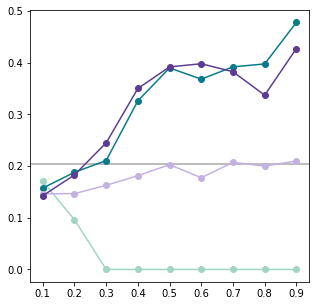

In [76]:
fig = plt.figure("Modularity - Summarized", figsize=(5, 5))
plt.xticks(np.arange(0, 9, step=1), labels=['{:.1f}'.format(x) for x in np.arange(0.1, 1, 0.1)])

initial_modularity = nx.algorithms.community.quality.modularity(starting_user_graph, list(starting_community_mapper.inverse.values()))
plt.axhline(y=initial_modularity, color='#a8a8a8', linestyle='-', label='initial')

for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]

                sub_logs = log_df.iloc[:min_epochs]
                homophily_d[run] = sub_logs['modularity']

            homophily_df = pd.DataFrame(homophily_d)

            row_data = homophily_df.iloc[-1].tolist()
            color = colors[condition][candidate_mode]
            plt.plot(row_data, c=color, marker="o", label='{} x {}'.format(condition, candidate_mode))

plt.legend()
#plt.savefig(os.path.join(parent_dir, 'modularity.png'),dpi=300)
plt.show()

## Coverage -- Messy from now on

[0.6859824221659466, 0.7315211569362614, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6588165151289312, 0.6875613518440611, 0.718687474989996, 0.8530618524976921, 0.9182498702967116, 0.9476295920817436, 0.9702113390850432, 0.9743416013668768, 0.97784611959199]
[0.6748621665921621, 0.692121862837203, 0.6827459874389393, 0.7275335537833106, 0.7184773196562979, 0.7079341357316324, 0.7075115297811795, 0.7118170553114791, 0.7144148020654044]
[0.7064876957494407, 0.7109083367897138, 0.7488110259147821, 0.861427508442562, 0.8947183236248485, 0.899958342679527, 0.9179287989716648, 0.9129651701761357, 0.930170671170134]


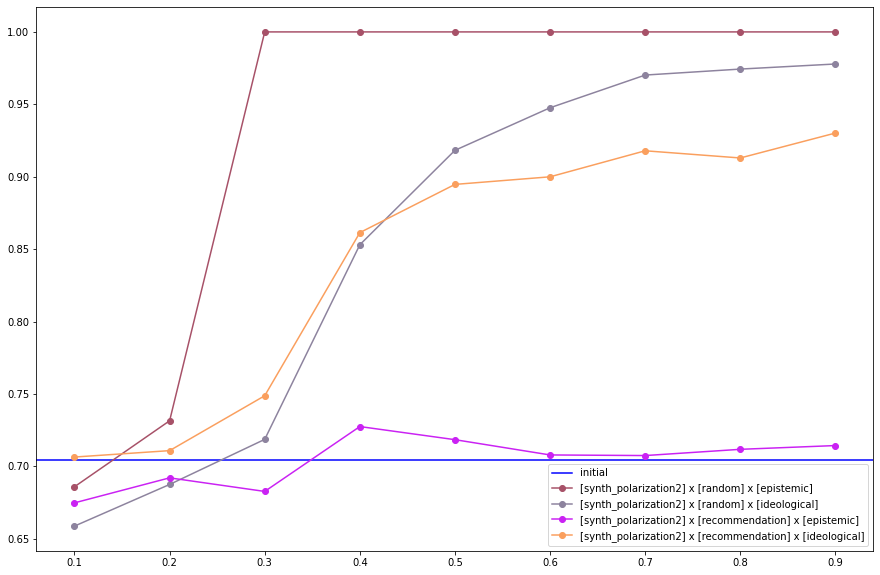

In [78]:
fig = plt.figure("Coverage - Summarized", figsize=(15, 10))
plt.xticks(np.arange(0, 9, step=1), labels=['{:.1f}'.format(x) for x in np.arange(0.1, 1, 0.1)])

communities = list(starting_community_mapper.inverse.values())
initial_modularity = nx.algorithms.community.quality.coverage(starting_user_graph, communities)
plt.axhline(y=initial_modularity, color='b', linestyle='-', label='initial')

for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]

                sub_logs = log_df.iloc[:min_epochs]
                homophily_d[run] = sub_logs['coverage']

            homophily_df = pd.DataFrame(homophily_d)

            row_data = homophily_df.iloc[-1].tolist()
            print(row_data)
            color = tuple(np.random.uniform(low=0, high=1, size=3))
            plt.plot(row_data, c=color, marker="o", label='[{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition))

plt.legend()
plt.show()

## Performance

0.5032442442442443
[0.4901871871871872, 0.3737817817817818, 0.0125845845845845, 0.0303663663663663, 0.0705545545545545, 0.1344904904904905, 0.2015825825825825, 0.2527797797797798, 0.2812772772772773]
[0.5018328328328329, 0.503016016016016, 0.4979079079079079, 0.5036136136136136, 0.524015015015015, 0.5407427427427427, 0.5797077077077077, 0.6073733733733734, 0.637893893893894]
[0.4572022022022022, 0.4481991991991992, 0.4934334334334334, 0.4717417417417417, 0.5011391391391391, 0.490081081081081, 0.517043043043043, 0.5111221221221222, 0.5177117117117117]
[0.4247857857857858, 0.4631861861861862, 0.5019309309309309, 0.5021791791791792, 0.5183993993993994, 0.523918918918919, 0.5066566566566567, 0.4765475475475475, 0.5321071071071071]


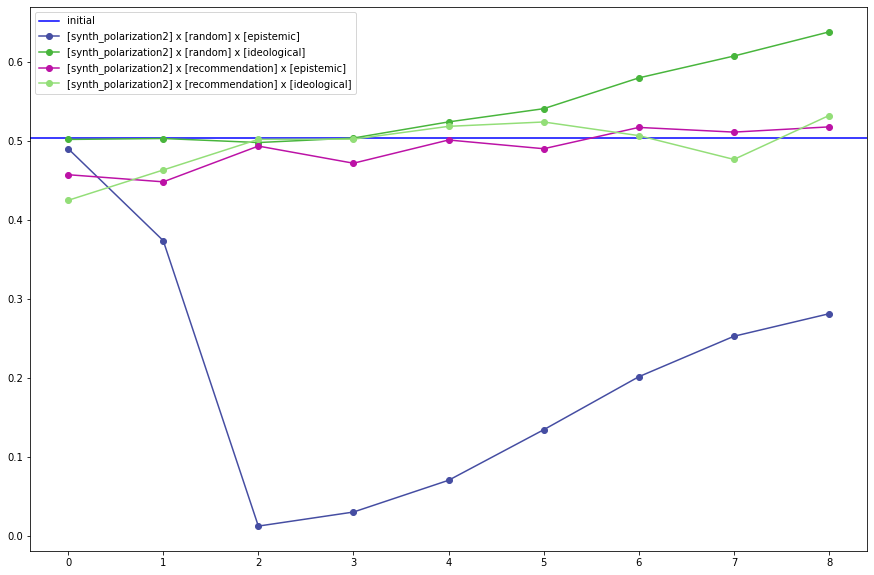

In [79]:
fig = plt.figure("Performance - Summarized", figsize=(15, 10))
initial_modularity = nx.algorithms.community.quality.performance(starting_user_graph, list(starting_community_mapper.inverse.values()))
print(initial_modularity)
plt.axhline(y=initial_modularity, color='b', linestyle='-', label='initial')

for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]

                sub_logs = log_df.iloc[:min_epochs]
                homophily_d[run] = sub_logs['performance']

            homophily_df = pd.DataFrame(homophily_d)

            row_data = homophily_df.iloc[-1].tolist()
            print(row_data)
            color = tuple(np.random.uniform(low=0, high=1, size=3))
            plt.plot(row_data, c=color, marker="o", label='[{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition))

plt.legend()
plt.show()

## Num Intra Edges

/home/tim/miniconda3/envs/ogbl-twitter/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


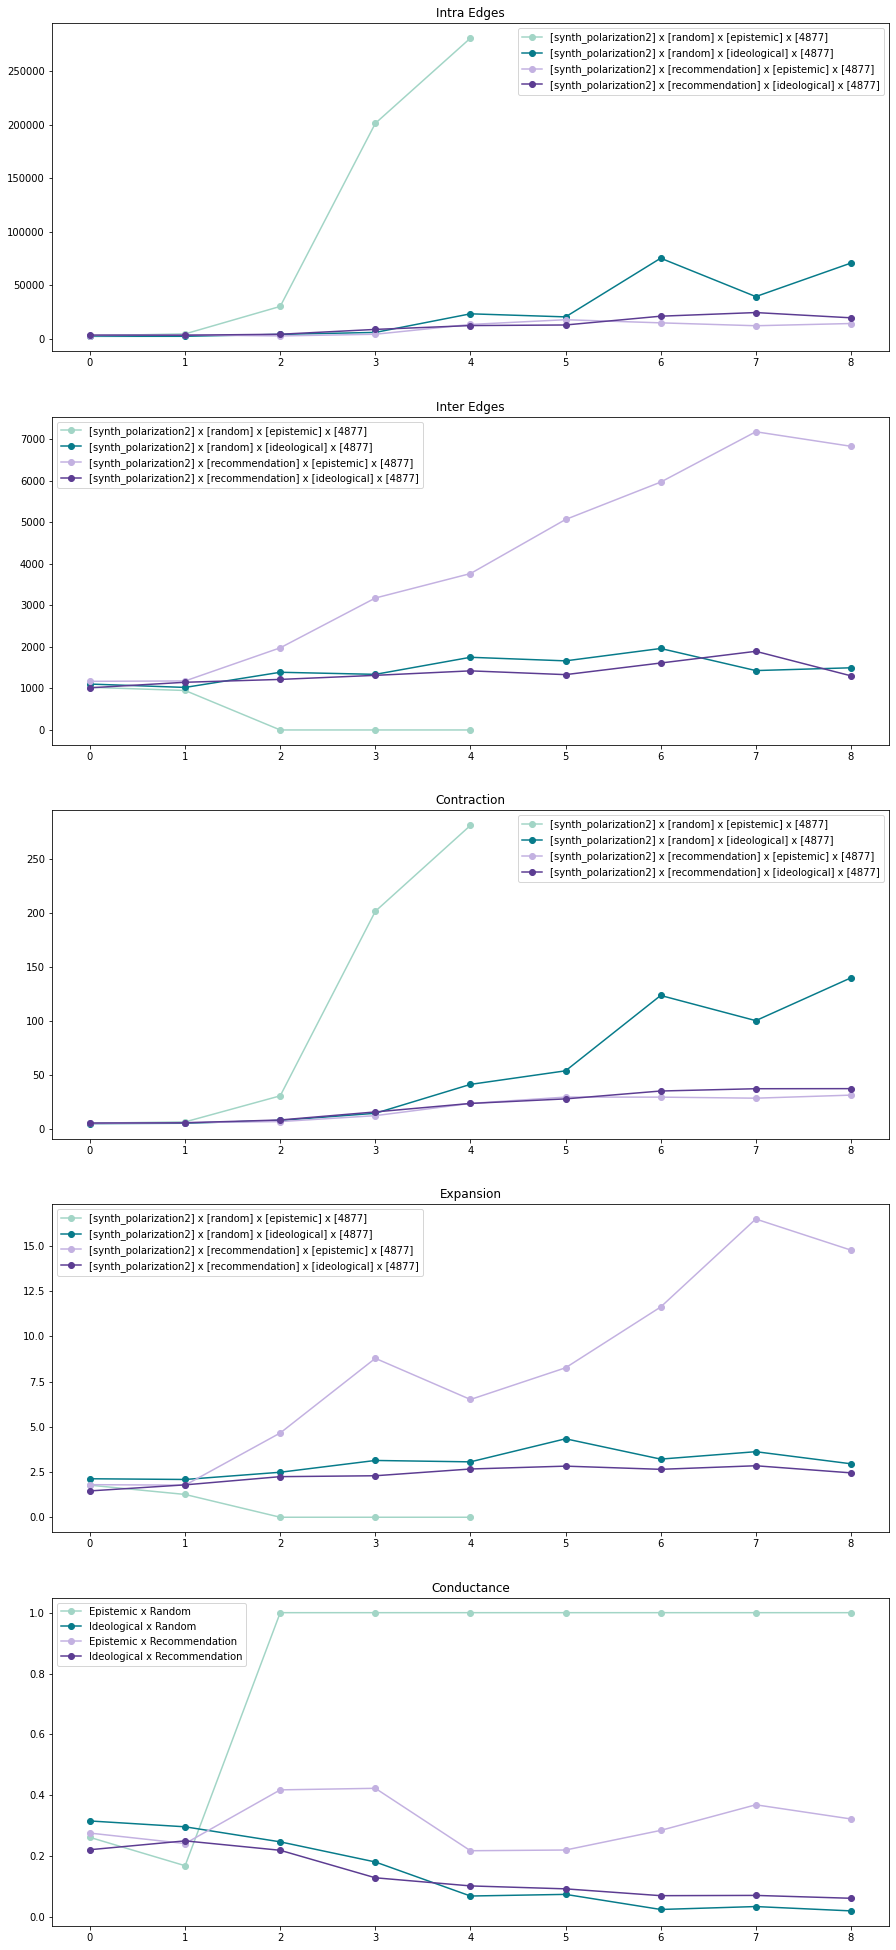

In [80]:
from itertools import chain

def intra_community_edges(G, partition):
    return dict([(block, G.subgraph(partition.inverse[block]).size()) for block in partition.inverse])

def inter_community_edges(G, partition):
    result = {}
    for u, v in G.edges():
        if partition[u] != partition[v]:
            if partition[u] not in result:
                result[partition[u]] = 1
            else:
                result[partition[u]] += 1
    return result

def inter_community_non_edges(G, partition):
    aff = dict(chain.from_iterable(((v, block) for v in block)
                                    for block in partition))

    return sum(1 for u, v in nx.non_edges(G) if aff[u] != aff[v])


#from graph import inter_community_edges, intra_community_edges

fig, axs = plt.subplots(5, figsize=(15,35))

axs[0].set_title('Intra Edges')
axs[1].set_title('Inter Edges')
axs[2].set_title('Contraction')
axs[3].set_title('Expansion')
axs[4].set_title('Conductance')

#initial_modularity = nx.algorithms.community.quality.performance(starting_user_graph, list(starting_community_mapper.inverse.values()))
#plt.axhline(y=initial_modularity, color='b', linestyle='-', label='initial')


community_idx = [5279, 5280] # echo chamber
community_idx = [5280] # echo chamber only
community_idx = [4877, 4876] # polarization
community_idx = [4877] # polarization, one community only
for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            
            g_intra_edge_dict = defaultdict(list) # Community, Run
            g_inter_edge_dict = defaultdict(list)
            g_contraction_dict = defaultdict(list)    
            g_expansion_dict = defaultdict(list)
            g_conductance_dict = defaultdict(list)
            
            for run in logs[dataset][candidate_mode][condition]:
                run_graph = nx.read_gexf(os.path.join(parent_dir, 'log', dataset, condition, candidate_mode, 'DistMult', run, 'user_graph_{}.gexf'.format(min_epochs-1)))
                
                communities = bidict(nx.get_node_attributes(run_graph, "community"))
                intra_edge_dict = intra_community_edges(run_graph, communities)
                inter_edge_dict = inter_community_edges(run_graph, communities)
                                
                for community in community_idx:
                    try:
                        community_nodes = communities.inverse[community]
                    except KeyError:
                        g_conductance_dict[community].append(1.0)
                        continue
                        
                    community_subgraph = run_graph.subgraph(community_nodes)
                    num_nodes = community_subgraph.number_of_nodes()
                    
                    intra_edges = intra_edge_dict[community]
                    try:
                        inter_edges = inter_edge_dict[community]
                    except KeyError:
                        inter_edges = 0
                    
                    g_intra_edge_dict[community].append(intra_edges)
                    g_inter_edge_dict[community].append(inter_edges)
                    g_contraction_dict[community].append(intra_edges / num_nodes)
                    g_expansion_dict[community].append(inter_edges / num_nodes)
                    conductance = inter_edges / (inter_edges + intra_edges)
                    if conductance == 0:
                        conductance = 1.0
                    g_conductance_dict[community].append(conductance)
                        
            for community in community_idx:
                color = colors[condition][candidate_mode]

                #color = tuple(np.random.uniform(low=0, high=1, size=3))
                axs[0].plot(g_intra_edge_dict[community], c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, community))
                axs[1].plot(g_inter_edge_dict[community], c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, community))
                axs[2].plot(g_contraction_dict[community], c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, community))
                axs[3].plot(g_expansion_dict[community], c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, community))
                #axs[4].plot(g_conductance_dict[community], c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, community))
                axs[4].plot(g_conductance_dict[community], c=color, marker="o", label='{} x {}'.format(condition.capitalize(), candidate_mode.capitalize()))



for ax in axs:
    ax.legend()

fig.show()

## Modularity - Detailed

In [13]:
from networkx.algorithms.community.community_utils import is_partition

def modularity2(G, communities, weight="weight", resolution=1.0):
    if not isinstance(communities, list):
        communities = list(communities)
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    directed = G.is_directed()
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        m = sum(out_degree.values())
        norm = 1 / m**2
    else:
        out_degree = in_degree = dict(G.degree(weight=weight))
        deg_sum = sum(out_degree.values())
        m = deg_sum / 2
        norm = 1 / deg_sum**2

    def community_contribution(community):
        comm = set(community)
        print('Community size: {}'.format(len(comm)))
        L_c = sum(wt for u, v, wt in G.edges(comm, data=weight, default=1) if v in comm)
        print('Intra Community Links: {}'.format(L_c))
        out_degree_sum = sum(out_degree[u] for u in comm)
        in_degree_sum = sum(in_degree[u] for u in comm) if directed else out_degree_sum
        print('Num Edges: {}'.format(m))
        print('Out Degree Sum: {}'.format(out_degree_sum))
        print('In Degree Sum: {}'.format(in_degree_sum))
        print('Norm: {}'.format(norm))
        x = L_c / m
        y = out_degree_sum * in_degree_sum * norm
        print('X: {}'.format(x))
        print('Y: {}'.format(y))
        print()
        return L_c / m - resolution * out_degree_sum * in_degree_sum * norm

    return map(community_contribution, communities)

for dataset in logs:
    for candidate_mode in logs[dataset]:
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            for run in logs[dataset][candidate_mode][condition]:
                run_graph = nx.read_gexf(os.path.join(parent_dir, 'log', dataset, condition, candidate_mode, 'DistMult', run, 'user_graph_{}.gexf'.format(min_epochs-1)))
                
                communities = bidict(nx.get_node_attributes(run_graph, "community"))
                print(condition, candidate_mode)
                modu = modularity2(run_graph, list(communities.inverse.values()))
                print('Modularity: {}'.format(list(modu)))
                print()
                print()



epistemic random
Community size: 549
Intra Community Links: 2559
Num Edges: 6702
Out Degree Sum: 3653
In Degree Sum: 3676
Norm: 2.2263382764276817e-08
X: 0.3818263205013429
Y: 0.2989622324865322

Community size: 451
Intra Community Links: 1932
Num Edges: 6702
Out Degree Sum: 3049
In Degree Sum: 3026
Norm: 2.2263382764276817e-08
X: 0.288272157564906
Y: 0.20540806955009533

Modularity: [0.08286408801481071, 0.08286408801481066]


epistemic random
Community size: 537
Intra Community Links: 2575
Num Edges: 6930
Out Degree Sum: 3694
In Degree Sum: 3777
Norm: 2.0822531645042466e-08
X: 0.37157287157287155
Y: 0.290520917274164

Community size: 463
Intra Community Links: 2034
Num Edges: 6930
Out Degree Sum: 3236
In Degree Sum: 3153
Norm: 2.0822531645042466e-08
X: 0.2935064935064935
Y: 0.21245453920778595

Modularity: [0.08105195429870754, 0.08105195429870754]


epistemic random
Community size: 447
Intra Community Links: 2172
Num Edges: 8577
Out Degree Sum: 3831
In Degree Sum: 3636
Norm: 1.35934

## Homophily - Detailed

Calculating Homophily...: 100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 147.92it/s]


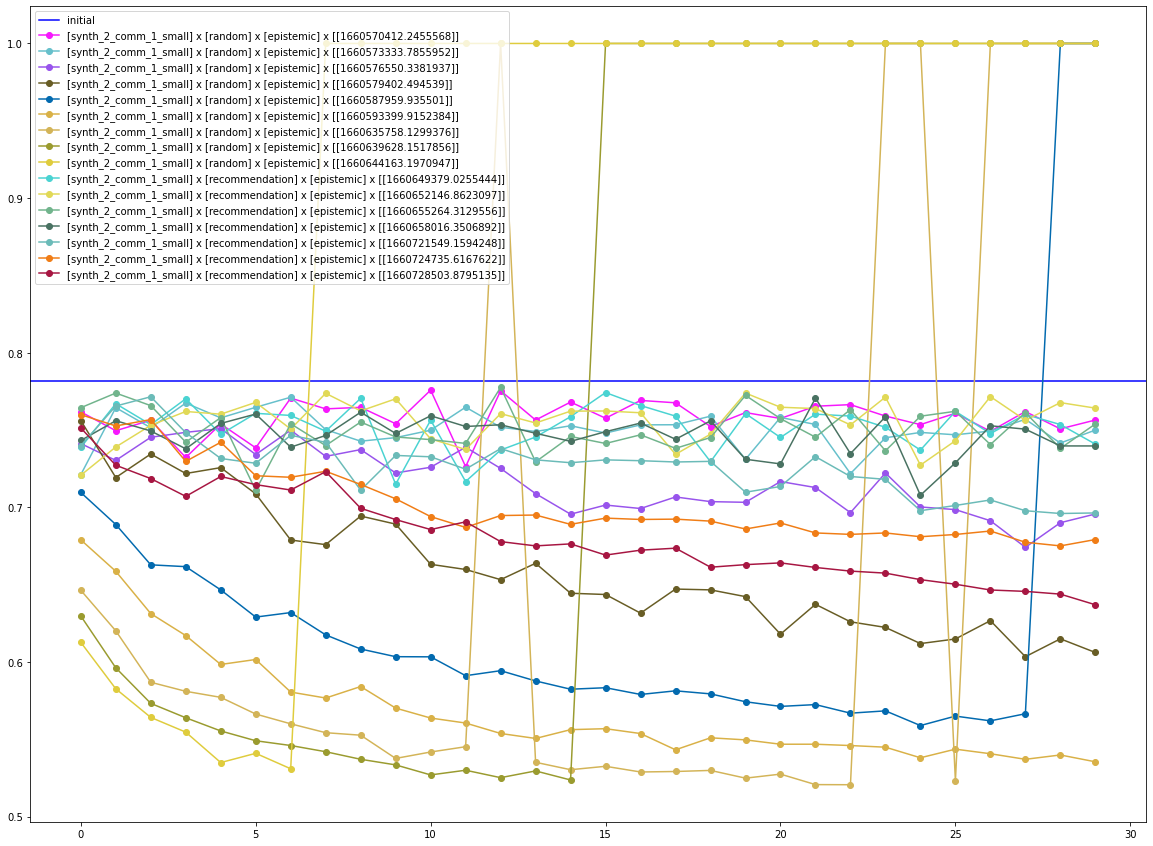

In [70]:
fig = plt.figure("Homophily - Detailed", figsize=(20, 15))
initial_homophily = homophily(starting_user_graph, starting_community_mapper.inverse)['global']
plt.axhline(y=initial_homophily, color='b', linestyle='-', label='initial')

for dataset in logs:
    for candidate_mode in logs[dataset]:
        
        
        for condition in logs[dataset][candidate_mode]:
            homophily_d = {}
            for run in logs[dataset][candidate_mode][condition]:
                log_df = logs[dataset][candidate_mode][condition][run]

                sub_logs = log_df.iloc[:min_epochs]
                homophily_d[run] = sub_logs['homophily_global']

            homophily_df = pd.DataFrame(homophily_d)
            for column in homophily_df:
                col_data = homophily_df[column]
                color = tuple(np.random.uniform(low=0, high=1, size=3))
                plt.plot(col_data, c=color, marker="o", label='[{}] x [{}] x [{}] x [{}]'.format(dataset, candidate_mode, condition, column))

plt.legend()
plt.show()

# Rest

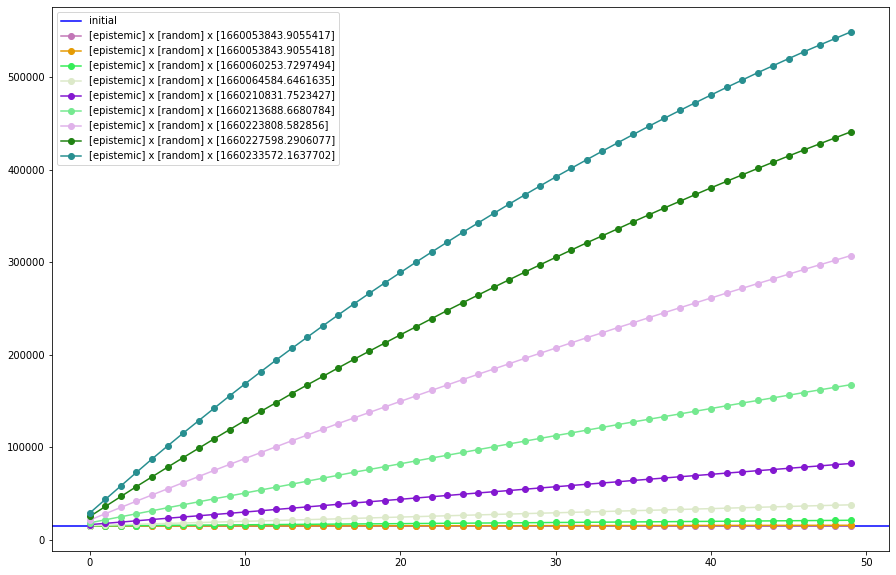

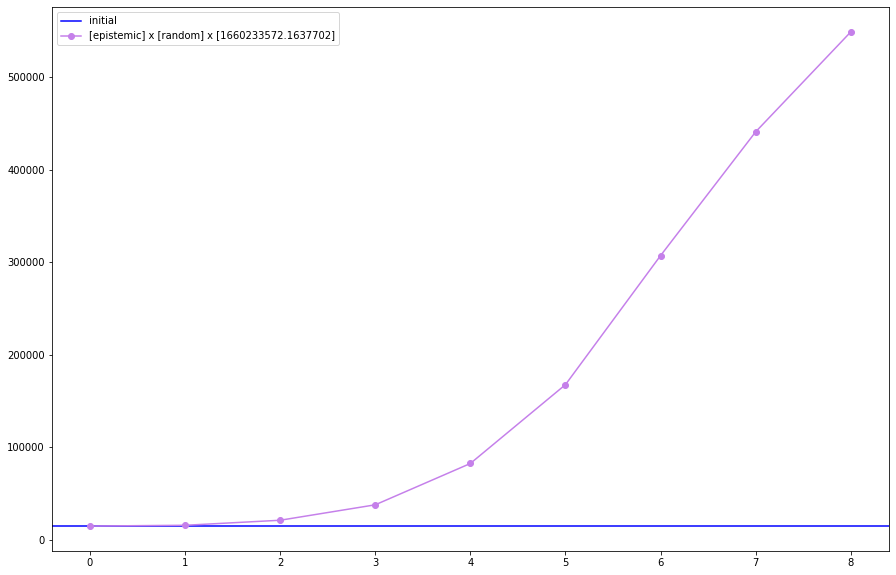

In [28]:
num_edges = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    num_edges[condition] = sub_logs['num_edges']
    
num_edges_df = pd.DataFrame(num_edges)

fig = plt.figure("Num Edges", figsize=(15, 10))
plt.axhline(y=len(starting_user_graph.edges()), color='b', linestyle='-', label='initial')

for column in num_edges_df:
    col_data = num_edges_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()


fig = plt.figure("Num Edges - Summarized", figsize=(15, 10))
plt.axhline(y=len(starting_user_graph.edges()), color='b', linestyle='-', label='initial')

row_data = num_edges_df.iloc[-1].tolist()
color = tuple(np.random.uniform(low=0, high=1, size=3))
plt.plot(row_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

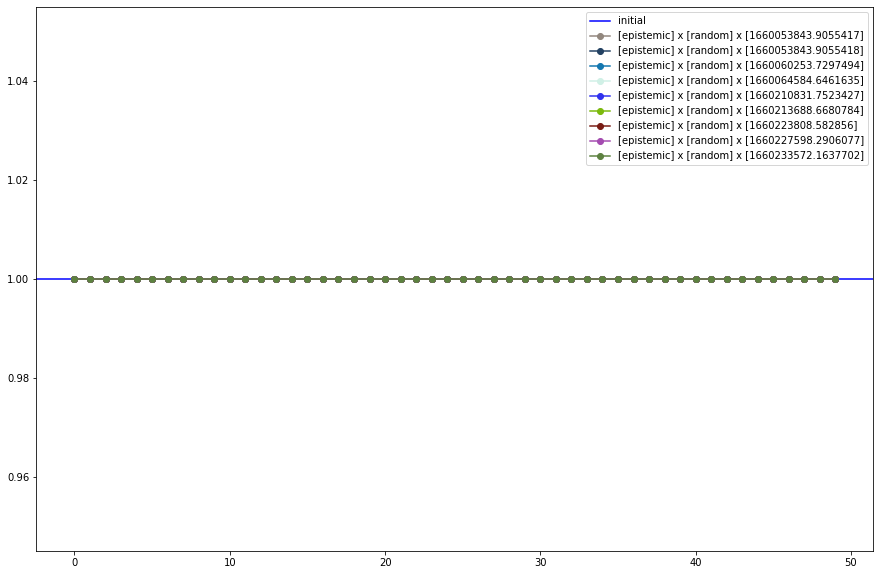

In [29]:
num_communities = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    num_communities[condition] = sub_logs['num_communities']
    
num_communities_df = pd.DataFrame(num_communities)

fig = plt.figure("Num Communities", figsize=(15, 10))
plt.axhline(y=len(starting_community_mapper.inverse), color='b', linestyle='-', label='initial')

for column in num_communities_df:
    col_data = num_communities_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

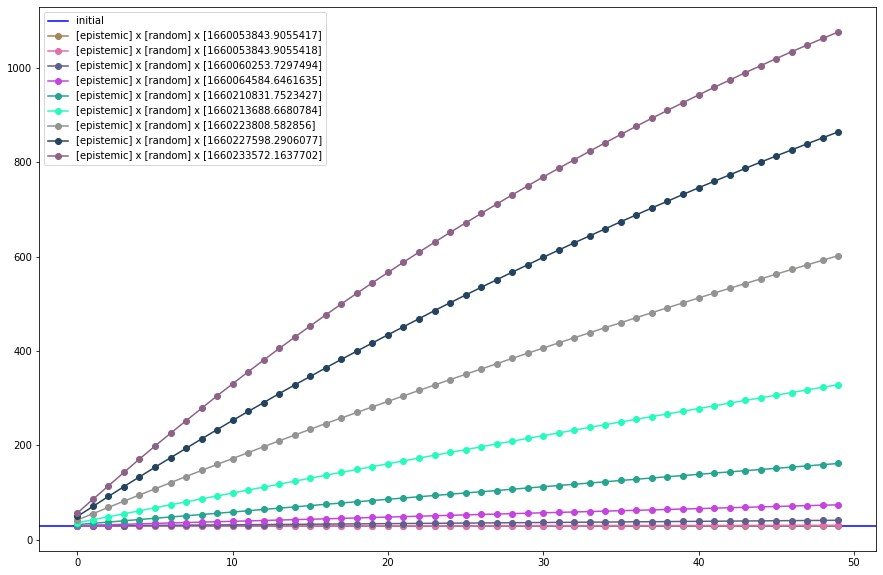

In [30]:
degree = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    degree[condition] = sub_logs['degree']
    
degree_df = pd.DataFrame(degree)

fig = plt.figure("Degree", figsize=(15, 10))
plt.axhline(y=starting_degree, color='b', linestyle='-', label='initial')

for column in degree_df:
    col_data = degree_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

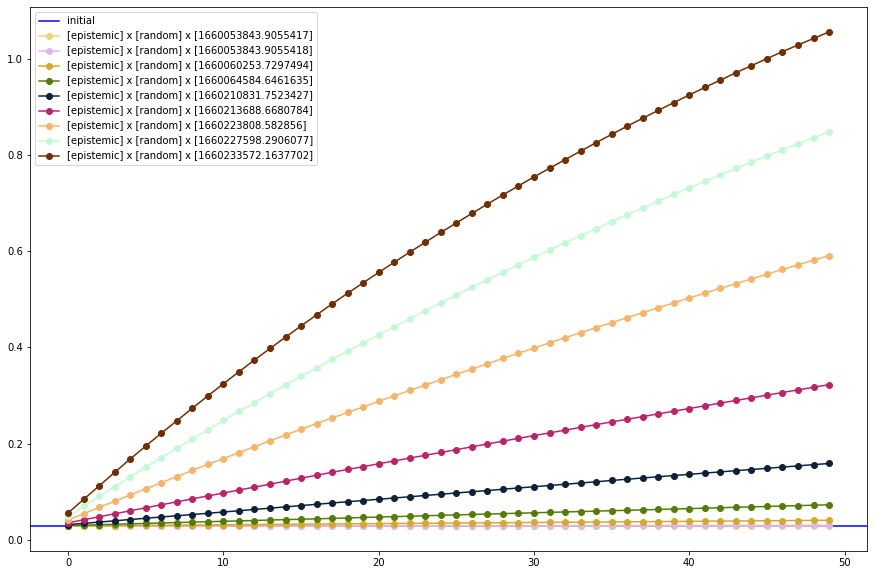

In [31]:
degree_centrality = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    degree_centrality[condition] = sub_logs['degree_centrality']
    
degree_centrality_df = pd.DataFrame(degree_centrality)

fig = plt.figure("Degree Centrality", figsize=(15, 10))

starting_degree_centrality = nx.degree_centrality(starting_user_graph)
starting_degree_centrality = np.mean(list(starting_degree_centrality.values()))
plt.axhline(y=starting_degree_centrality, color='b', linestyle='-', label='initial')

for column in degree_centrality_df:
    col_data = degree_centrality_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

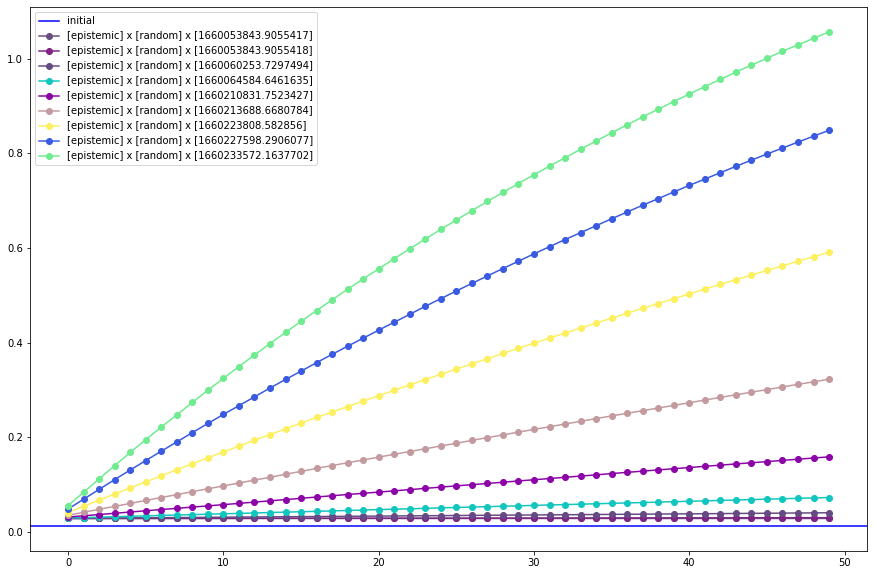

In [32]:
eigenvector_centrality = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    eigenvector_centrality[condition] = sub_logs['eigenvector_centrality']
    
eigenvector_centrality_df = pd.DataFrame(degree_centrality)

fig = plt.figure("Eigenvector Centrality", figsize=(15, 10))

starting_eigenvector_centrality = nx.eigenvector_centrality(starting_user_graph)
starting_eigenvector_centrality = np.mean(list(starting_eigenvector_centrality.values()))
plt.axhline(y=starting_eigenvector_centrality, color='b', linestyle='-', label='initial')

for column in eigenvector_centrality_df:
    col_data = eigenvector_centrality_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

Calculating Homophily...: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.89it/s]


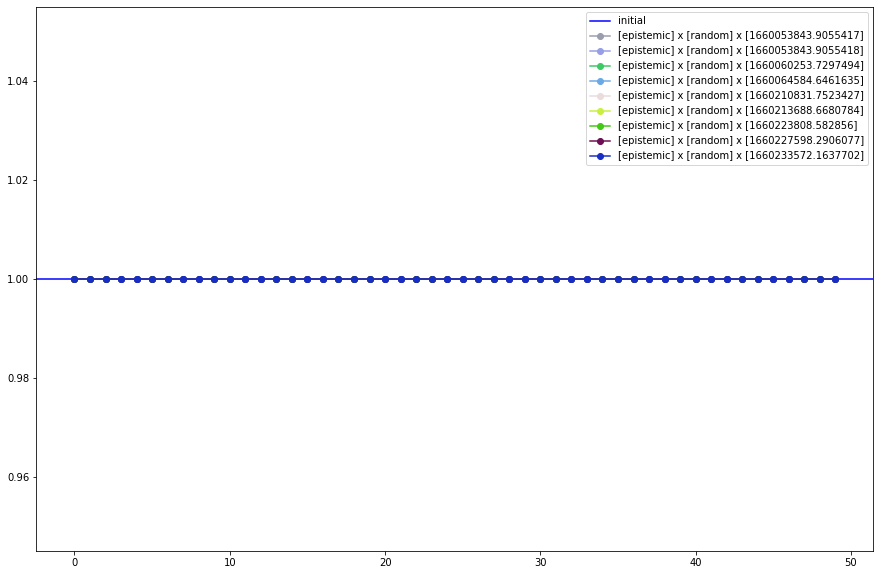

In [33]:
homophily_d = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    homophily_d[condition] = sub_logs['homophily_global']
    
homophily_df = pd.DataFrame(homophily_d)

fig = plt.figure("Homophily", figsize=(15, 10))
initial_homophily = homophily(starting_user_graph, starting_community_mapper.inverse)['global']
plt.axhline(y=initial_homophily, color='b', linestyle='-', label='initial')

for column in homophily_df:
    col_data = homophily_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

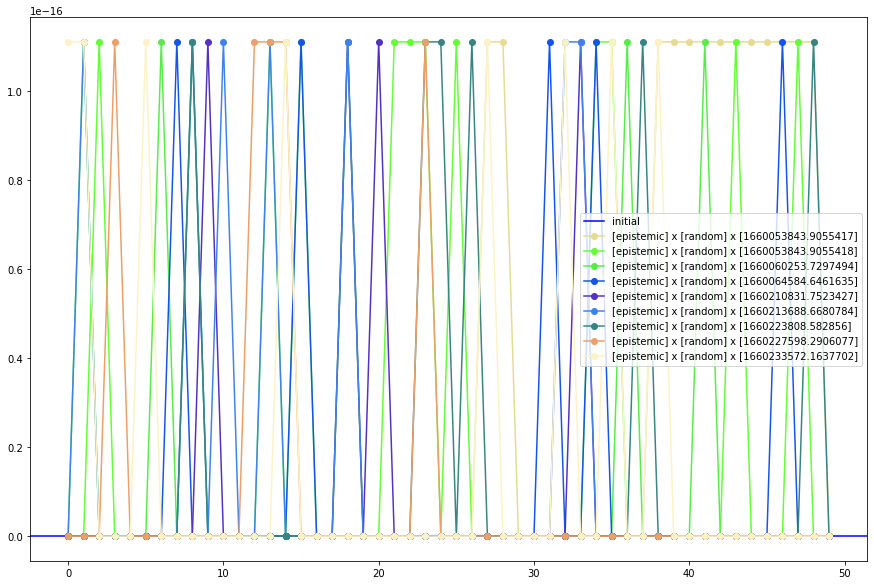

In [34]:
modularity_d = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    modularity_d[condition] = sub_logs['modularity']
    
modularity_df = pd.DataFrame(modularity_d)

fig = plt.figure("Modularity", figsize=(15, 10))

starting_modularity = nx.algorithms.community.quality.modularity(starting_user_graph, list(starting_community_mapper.inverse.values()))
plt.axhline(y=starting_modularity, color='b', linestyle='-', label='initial')

for column in modularity_df:
    col_data = modularity_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

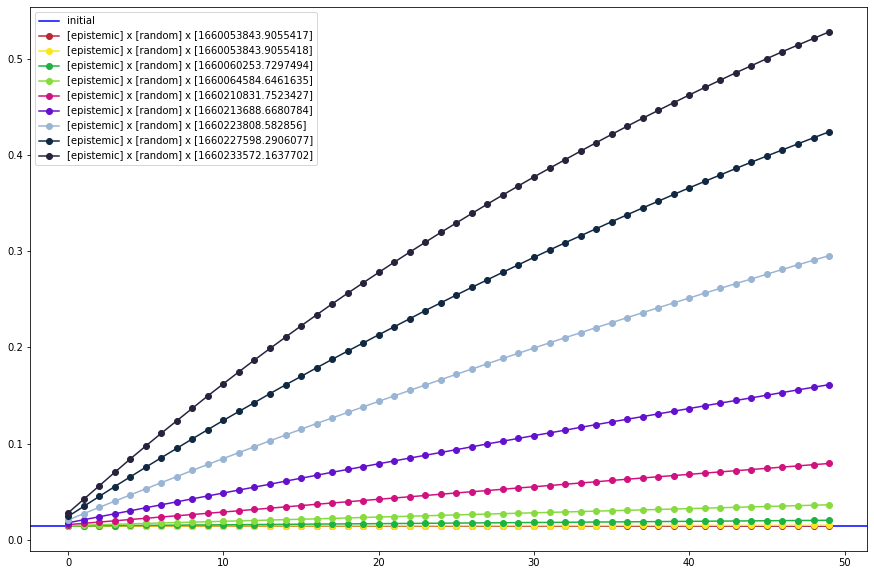

In [35]:
performance_d = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    performance_d[condition] = sub_logs['performance']
    
performance_df = pd.DataFrame(performance_d)

fig = plt.figure("Community Performance", figsize=(15, 10))

starting_performance = perf(starting_user_graph, list(starting_community_mapper.inverse.values()))
plt.axhline(y=starting_performance, color='b', linestyle='-', label='initial')

for column in modularity_df:
    col_data = performance_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()

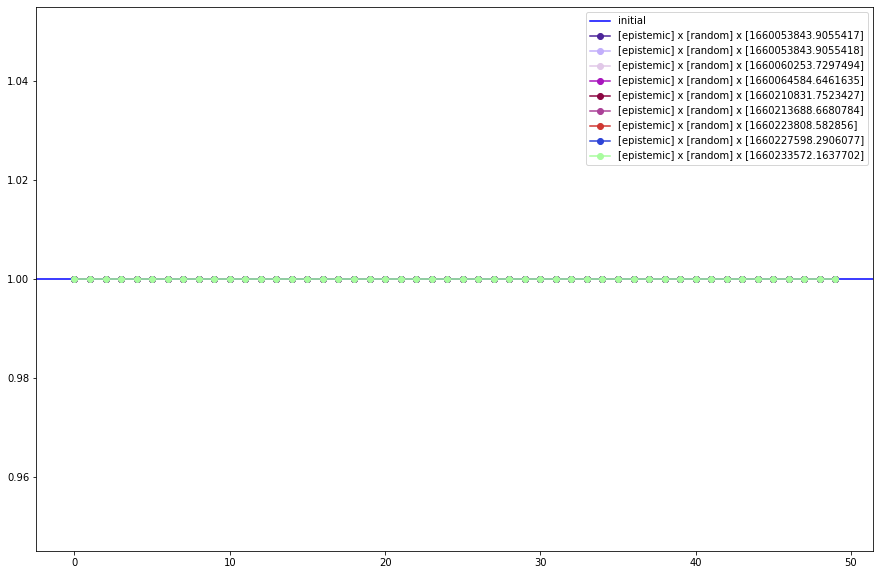

In [36]:
coverage_d = {}

for condition, log_df in logs.items():
    sub_logs = log_df.iloc[:min_epochs]
    coverage_d[condition] = sub_logs['coverage']
    
coverage_df = pd.DataFrame(coverage_d)

fig = plt.figure("Coverage", figsize=(15, 10))

starting_coverage = nx.algorithms.community.quality.coverage(starting_user_graph, list(starting_community_mapper.inverse.values()))
plt.axhline(y=starting_coverage, color='b', linestyle='-', label='initial')

for column in coverage_df:
    col_data = coverage_df[column]
    color = tuple(np.random.uniform(low=0, high=1, size=3))
    plt.plot(col_data, c=color, marker="o", label=column)

plt.legend()
plt.show()